In [28]:
from test_hmmbatchcd import *
from test_hmmbatchsgd import *

#define epsilon for test_hmmbatchsgd likelihood convergence
epsilon=10**(-8)

[2.28428957 3.18361902]
Hamming Distance =  0.37666666666666665


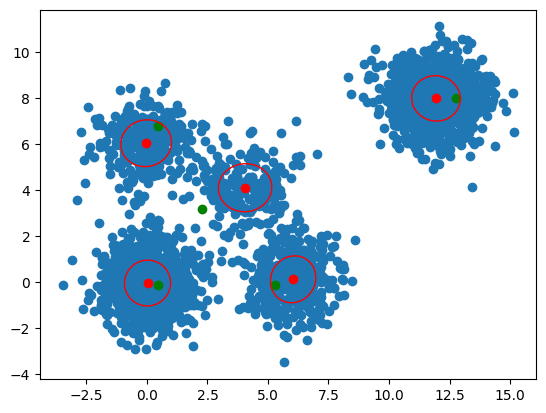

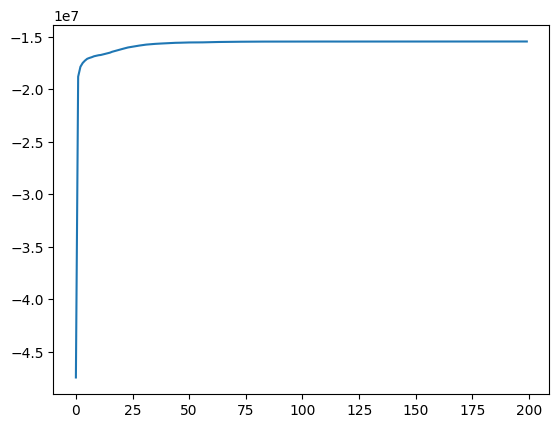

In [2]:
test_hmmbatchsgd(maxit=200, epsilon=epsilon, batch_size=256)

[3.47002712 2.98508716]
Hamming Distance =  0.317


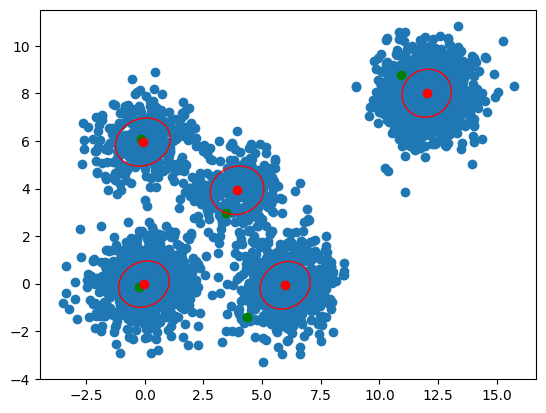

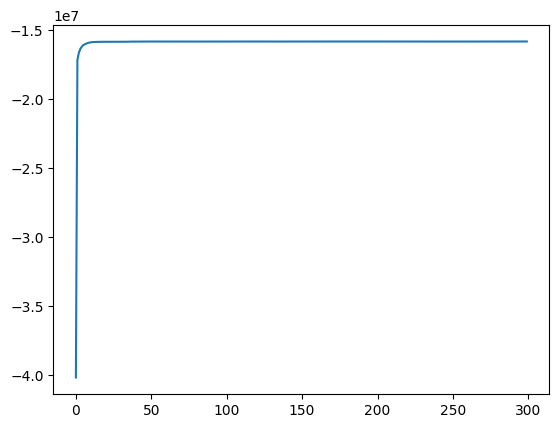

In [7]:
#batch 700 - 300 it
test_hmmbatchsgd(maxit=300, epsilon=epsilon, batch_size=700)

[10.08781362  8.79037302]
Hamming Distance =  0.37366666666666665


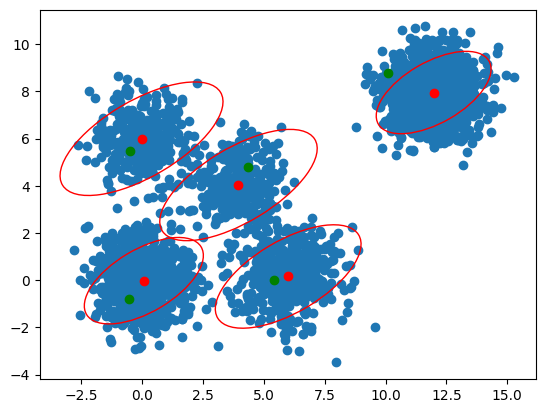

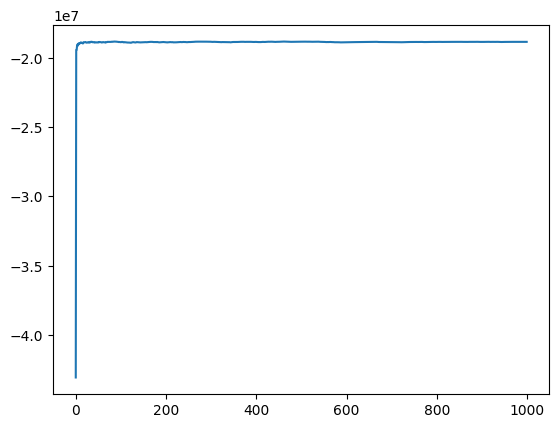

In [8]:
#batch 10 - 1000 it

test_hmmbatchsgd(maxit=1000, epsilon=epsilon, batch_size=10)

[10.90148735  7.52304667]
Hamming Distance =  0.388


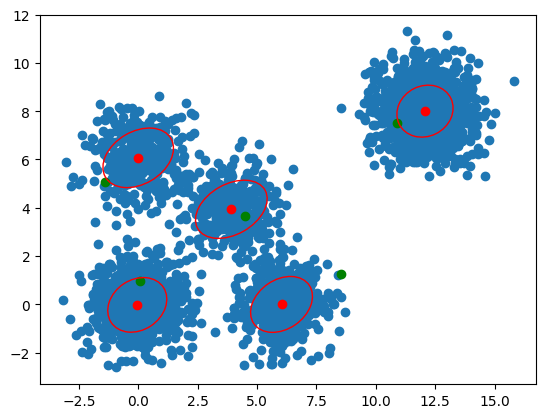

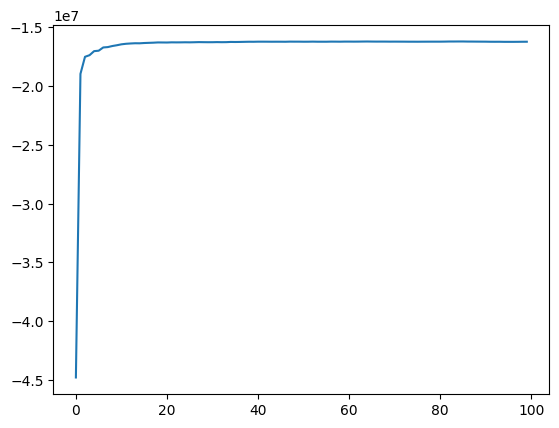

In [17]:
#batch 150 - 100 it
test_hmmbatchsgd(maxit=100, epsilon=epsilon, batch_size=150)

In [15]:
#in case we want to see the elbo

# code from test_hmmbatchcd
import numpy as np
import matplotlib.pyplot as plt
import util
import hmmbatchsgd as HMM

from scipy.spatial.distance import hamming as hd
from pybasicbayes.distributions import Gaussian
from util import *

#make test_hmmbatchsgd return the elbo

#elbo=test_hmmbatchsgd()

#plt.plot(elbo)

#elbo

## Runtime comparison: sgd vs all observations

[4.47908485 4.12757883]
Hamming Distance =  0.361


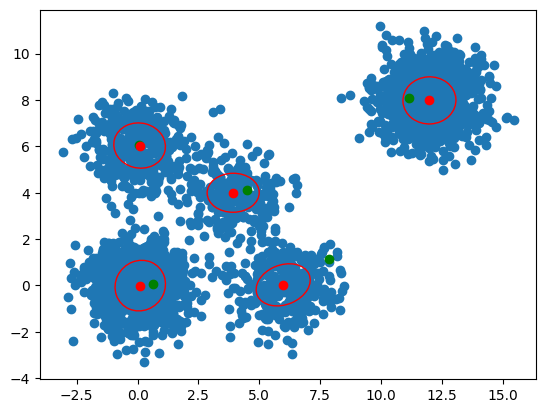

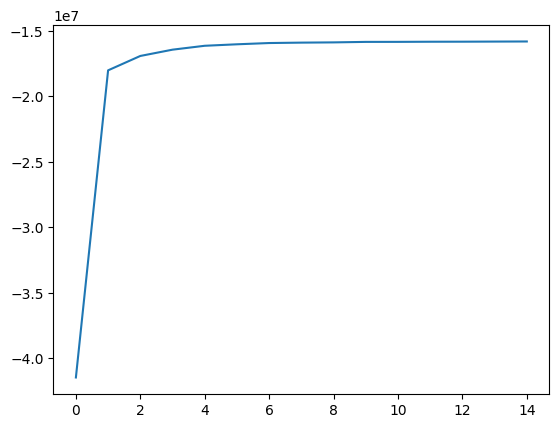

True
terminated early - convergence, 
 elbo : -15707226.801650971 
 lower bound : -15707226.801650971
allclose  = True, diff : 0.0
[5.00135916 4.76371834]
Hamming Distance =  0.36866666666666664


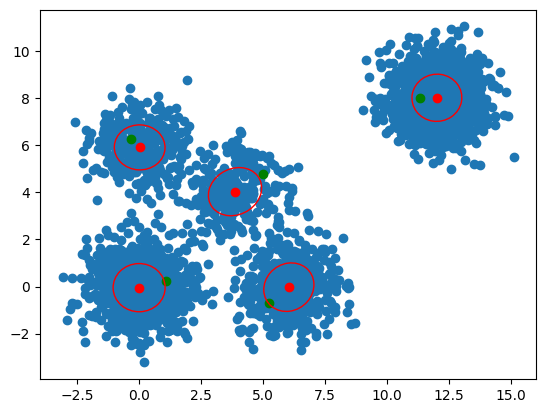

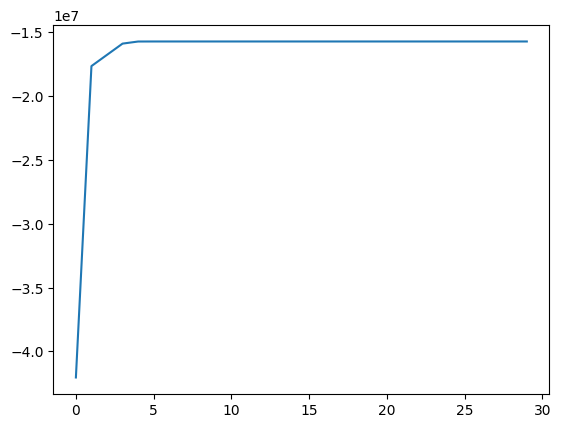

test_hmmbatchsgd() took 1.26 seconds to run
test_hmmbatchcd() took 2.24 seconds to run


In [29]:
#15 maxit 150 batch
from test_hmmbatchcd import *
from test_hmmbatchsgd import *
import time

# time the execution of test_hmmbatchsgd()
start_time = time.time()
test_hmmbatchsgd(maxit=15, epsilon=epsilon, batch_size=150)
end_time = time.time()
elapsed_time_sgd = end_time - start_time

# time the execution of test_hmmbatchcd()
start_time = time.time()
test_hmmbatchcd()
end_time = time.time()
elapsed_time_cd = end_time - start_time

print("test_hmmbatchsgd() took {:.2f} seconds to run".format(elapsed_time_sgd))

print("test_hmmbatchcd() took {:.2f} seconds to run".format(elapsed_time_cd))

## Zoomed ELBO for SVI

In [2]:
#generate data

import numpy as np
from pybasicbayes import distributions as dist
from pybasicbayes.distributions import Gaussian
import matplotlib.pyplot as plt
from generate_data import *

centers = np.array([np.array([0,0]),np.array([6,0]),np.array([4,4]),np.array([0,6]),np.array([12,8])])
# centers = [np.array([0,0]),np.array([6,6])]
# centers = [np.array([0,0,0]),np.array([6,0,6]),np.array([4,4,4])]

K = 5           # number of states  
D = 2        #have to be equal (symmetry)
kappa_0 = 0.5     #??? variance of emissions ?
nu_0 = 4        #??? smoothing?

T = np.array([
    [0.89,0.01,0.01,0.05,0.04],
    [0.05,0.8,0.05,0.05,0.05],
    [0.05,0.1,0.7,0.05,0.1],
    [0.1,0.1,0.05,0.7,0.05],
    [0.025,0.025,0.025,0.025,0.9]
    ])
# T = np.array([[0.8,0.2],[0.3,0.7]])

N = 3000

emit = make_emissions(centers , kappa_0, nu_0)


seq, ind = generate_states(T,N)

obs = generate_data(emit,ind)


In [20]:
#SVI

#code from test_batchsgd
import numpy as np
import matplotlib.pyplot as plt
import util
import hmmbatchsgd as SGD_HMM

from scipy.spatial.distance import hamming as hd
from pybasicbayes.distributions import Gaussian
from util import *

from pybasicbayes import distributions as dist
from generate_data import *

from sklearn.cluster import KMeans

maxit = 500
batch_size = 128
epsilon = 10**(-8)

# define object for inferrence from hmmbatchcd.py
# pass priors on init transitions and emissions for each state
hmm_sgd = SGD_HMM.VBHMM(obs, prior_init, prior_tran, prior_emit, maxit=maxit, epsilon=epsilon, batch_size=batch_size)  
hmm_sgd.infer() # do inference 
sts_true = seq # true states 
# hamming distance
print(prior_emit[0].mu_mf)
print('Hamming Distance = ', hmm_sgd.hamming_dist(hmm_sgd.var_x, sts_true)[0]) 

# plot learned emissions over observations

# plots mean_field values (prior in green, posterior approximations in red)
# prior values are green
# var_emit are red 
#a = util.plot_emissions(obs, prior_emit, hmm_sgd.var_emit)
#plt.show()

[0.86133492 6.34107447]
Hamming Distance =  0.3423333333333333


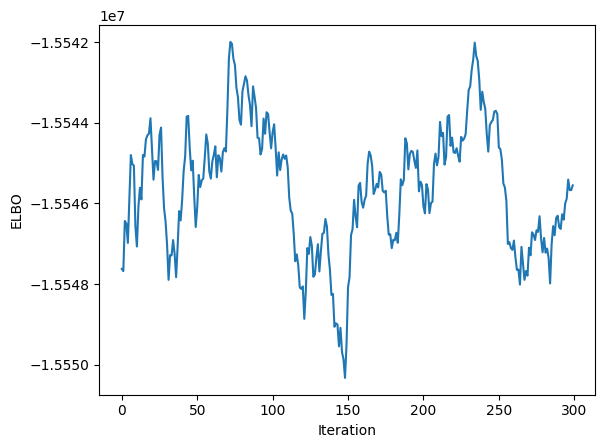

In [10]:
# plot elbo over iterations, zoom with
plt.xlabel('Iteration')
plt.ylabel('ELBO')

plt.plot(hmm_sgd.elbo_vec[200:500])
plt.show()

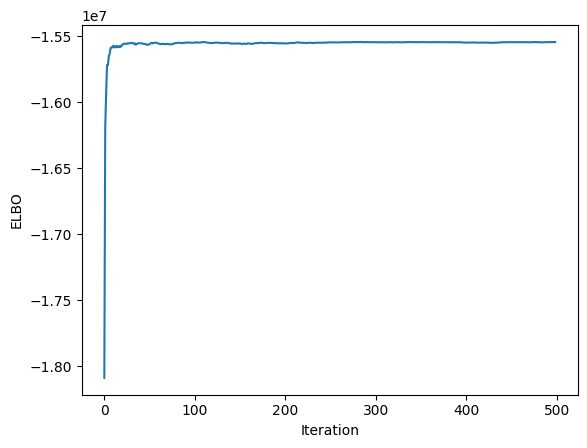

In [27]:
# plot elbo over iterations, zoom with
plt.xlabel('Iteration')
plt.ylabel('ELBO')

plt.plot(hmm_sgd.elbo_vec[1:500])
plt.show()

## hmm distance vs batch_size

In [31]:
maxit = 15

#batch_sizes = [1, 5, 10, 20,  25, 50, 100, 200, 500]
batch_sizes = range(1, 200, 2)
hmm_distances = []

#loop for different batch sizes
for batch_size in batch_sizes:
    
    distance = 0
    n_tries = 10
    
    for i in range(n_tries):
    
        hmm_sgd = SGD_HMM.VBHMM(obs, prior_init, prior_tran, prior_emit, maxit=maxit, epsilon=epsilon, batch_size=batch_size)  
        hmm_sgd.infer()
        
        distance += hmm_sgd.hamming_dist(hmm_sgd.var_x, sts_true)[0]
    
    #print('Batch size =', batch_size)
    #print('Hamming Distance = ', hmm_sgd.hamming_dist(hmm_sgd.var_x, sts_true)[0]) 

    hmm_distances.append(distance/n_tries)


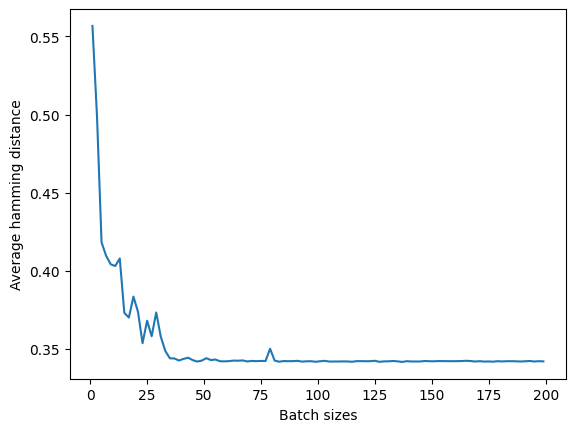

In [32]:
plt.plot(batch_sizes, hmm_distances, '-') #'o-'

plt.xlabel('Batch sizes')
plt.ylabel('Average hamming distance')

plt.show()

## Plot comparisons  MCMC, VI full dataset, good/bad SVI 

In [ ]:
# add distribution plot comparison with 
#  MCMC, VI full dataset, good approx SVI with enough batch_size, bad approx SVI with small batch_size

# add 1 or 2 plots of zoomed elbo

# add plot of hmm distance vs batch_size


In [3]:
#generate data

import numpy as np
from pybasicbayes import distributions as dist
from pybasicbayes.distributions import Gaussian
import matplotlib.pyplot as plt
from generate_data import *

centers = np.array([np.array([0,0]),np.array([6,0]),np.array([4,4]),np.array([0,6]),np.array([12,8])])
# centers = [np.array([0,0]),np.array([6,6])]
# centers = [np.array([0,0,0]),np.array([6,0,6]),np.array([4,4,4])]

K = 5           # number of states  
D = 2        #have to be equal (symmetry)
kappa_0 = 0.5     #??? variance of emissions ?
nu_0 = 4        #??? smoothing?

T = np.array([
    [0.89,0.01,0.01,0.05,0.04],
    [0.05,0.8,0.05,0.05,0.05],
    [0.05,0.1,0.7,0.05,0.1],
    [0.1,0.1,0.05,0.7,0.05],
    [0.025,0.025,0.025,0.025,0.9]
    ])
# T = np.array([[0.8,0.2],[0.3,0.7]])

N = 3000

emit = make_emissions(centers , kappa_0, nu_0)


seq, ind = generate_states(T,N)

obs = generate_data(emit,ind)


[0.86133492 6.34107447]
True
terminated early - convergence, 
 elbo : -15541111.77931883 
 lower bound : -15541111.77931883
allclose  = True, diff : 0.0
[0.86133492 6.34107447]
Hamming Distance =  0.342


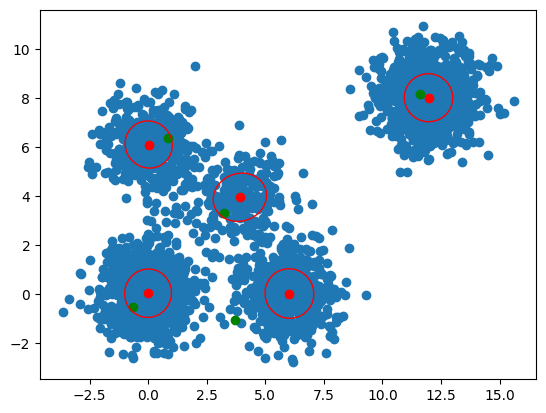

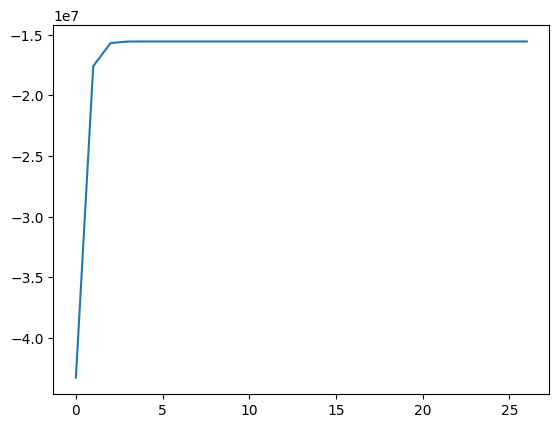

In [4]:
#VI

# code from test_hmmbatchcd
import numpy as np
import matplotlib.pyplot as plt
import util
import hmmbatchcd as HMM
import seaborn as sns
from scipy.spatial.distance import hamming as hd
from pybasicbayes.distributions import Gaussian
from util import *
from sklearn.cluster import KMeans


kmeans = KMeans(init="random",n_clusters=K,n_init=10,max_iter=300,random_state=42)
kmeans.fit(obs)

mu_0 = kmeans.cluster_centers_ #np.zeros(D)
sigma_0 = 0.75*np.cov(obs.T)
kappa_0 = 10 # high value for stability (low rescale when Gaussian mu_0 --> mu_mf resample(--> nat_to_standard()))
# if we use the KMeans we are pretty confident in the centers so we can set a high value
# consult this step with Jack and Benni !!!!!!!!!!!!!
nu_0 = 4


# define emisssion RV for each state (2)
prior_emit = [Gaussian(mu_0=mu_0[i], sigma_0=sigma_0, kappa_0=kappa_0, 
                        nu_0=nu_0) for i in range(K)]
prior_emit = np.array(prior_emit)           # prior on emissions retype
prior_tran = np.ones(K*K).reshape((K,K))    # prior on transition matrix all 1
prior_init = np.ones(K)                     # ?
print(prior_emit[0].mu_mf)
# define object for inferrence from hmmbatchcd.py
# pass priors on init transitions and emissions for each state
hmm = HMM.VBHMM(obs, prior_init, prior_tran, prior_emit,maxit=1000, epsilon=10**(-12))  
hmm.infer() # do inference 
sts_true = seq # true states 
# hamming distance
print(prior_emit[0].mu_mf)
print('Hamming Distance = ', hmm.hamming_dist(hmm.var_x, sts_true)[0]) 

# plot learned emissions over observations

# plots mean_field values (prior in green, posterior approximations in red)
# prior values are green
# var_emit are red 
a = util.plot_emissions(obs, prior_emit, hmm.var_emit)
plt.show()

# plot elbo over iterations
plt.plot(hmm.elbo_vec)
plt.show()


[3.69252096 0.10614901]
Hamming Distance =  0.322


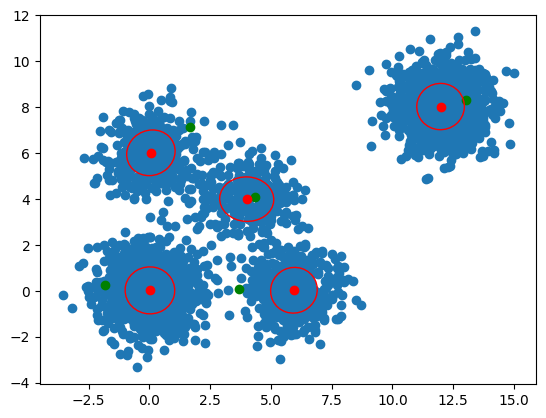

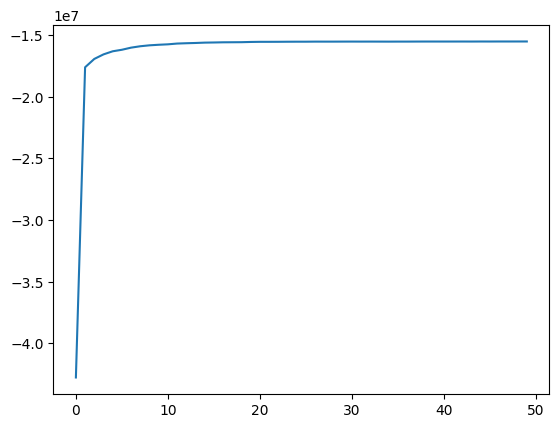

In [7]:
#SVI

#code from test_batchsgd
import numpy as np
import matplotlib.pyplot as plt
import util
import hmmbatchsgd as SGD_HMM

from scipy.spatial.distance import hamming as hd
from pybasicbayes.distributions import Gaussian
from util import *

from pybasicbayes import distributions as dist
from generate_data import *

from sklearn.cluster import KMeans

maxit = 50
batch_size = 256
epsilon = 10**(-8)

# define object for inferrence from hmmbatchcd.py
# pass priors on init transitions and emissions for each state
hmm_sgd = SGD_HMM.VBHMM(obs, prior_init, prior_tran, prior_emit, maxit=maxit, epsilon=epsilon, batch_size=batch_size)  
hmm_sgd.infer() # do inference 
sts_true = seq # true states 
# hamming distance
print(prior_emit[0].mu_mf)
print('Hamming Distance = ', hmm_sgd.hamming_dist(hmm_sgd.var_x, sts_true)[0]) 

# plot learned emissions over observations

# plots mean_field values (prior in green, posterior approximations in red)
# prior values are green
# var_emit are red 
a = util.plot_emissions(obs, prior_emit, hmm_sgd.var_emit)
plt.show()

# plot elbo over iterations
plt.plot(hmm_sgd.elbo_vec)
plt.show()

In [12]:
#MCMC

import stan
import numpy as np
import nest_asyncio
nest_asyncio.apply()

dat = [tuple(i) for  i in obs]
data = {'y':dat , "N": N, "D":D, "K":K, 'mu_0':mu_0 , 'kappa_0':kappa_0, 'nu_0':nu_0,'Psi_0':sigma_0,'alpha_0':np.ones((K,K))} #specify dirichlet prior [1,1,1,...] on transitions

# read code from .stan file 
with open('BenJackCode/MvNormEmis_HMM.stan') as f:
    stan_code = f.read()

# build stan model
jack_model = stan.build(stan_code,data)

N_MCMC = 1000 

# start sampling
fit = jack_model.sample(num_chains = 1, num_samples = 1000+N_MCMC, num_warmup = 1000 )

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s


In file included from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/tbb/task_arena.h:23,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/core/init_threadpool_tbb.hpp:18,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/core.hpp:4,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core/Eigen_NumTraits.hpp:5,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3

Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s


In file included from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/boost/multi_array/multi_array_ref.hpp:32,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/boost/multi_array.hpp:34,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/boost/numeric/odeint.hpp:63,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/functor/ode_rk45.hpp:9,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from /run/media/davovapo/hdd1-dvp/DSMMa

Building: 5.9s
Building: 6.0s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s


In file included from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:6:
/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/io/cmd_line.hpp: In function ‘void stan::io::pad_help_option(std::ostream*, const std::string&, unsigned int)’:
/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/io/cmd_line.hpp:29: note: ‘-Wmisleading-indentation’ is disabled from this point onwards, since column-tracking was disabled due to the size of the code/headers
   29 |   if (!o)
      | 
/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/io/cmd_line.hpp:29: note: adding ‘-flarge-source-files’ will allow for more column-tracking support, at the expense of compilation time and memory
In file included from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/https

Building: 7.2s
Building: 7.3s
Building: 7.4s


In file included from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = double; T2 = double; T3 = double; T_z = double; ScalarT = doub

Building: 7.5s
Building: 7.6s
Building: 7.7s


/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = double; T2 = double; T3 = double; T_z = double; ScalarT = double; TupleT = std::tuple<double, double, double>]’:
/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = double; T2 = double; T3 = double; T_z = double; ScalarT = double; TupleT = std::tuple<double, double, double, double>]’
/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/includ

Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s


RuntimeError: Exception while building model extension module: `CompileError(DistutilsExecError("command '/usr/bin/gcc' failed with exit code 1"))`, traceback: `['  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/views.py", line 114, in handle_create_model\n    compiler_output = await httpstan.models.build_services_extension_module(program_code)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/models.py", line 172, in build_services_extension_module\n    compiler_output = await asyncio.get_running_loop().run_in_executor(\n', '  File "/usr/lib/python3.10/asyncio/futures.py", line 285, in __await__\n    yield self  # This tells Task to wait for completion.\n', '  File "/usr/lib/python3.10/asyncio/tasks.py", line 304, in __wakeup\n    future.result()\n', '  File "/usr/lib/python3.10/asyncio/futures.py", line 201, in result\n    raise self._exception.with_traceback(self._exception_tb)\n', '  File "/usr/lib/python3.10/concurrent/futures/thread.py", line 58, in run\n    result = self.fn(*self.args, **self.kwargs)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/httpstan/build_ext.py", line 86, in run_build_ext\n    build_extension.run()\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/command/build_ext.py", line 84, in run\n    _build_ext.run(self)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/Cython/Distutils/old_build_ext.py", line 186, in run\n    _build_ext.build_ext.run(self)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/_distutils/command/build_ext.py", line 345, in run\n    self.build_extensions()\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/Cython/Distutils/old_build_ext.py", line 195, in build_extensions\n    _build_ext.build_ext.build_extensions(self)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/_distutils/command/build_ext.py", line 467, in build_extensions\n    self._build_extensions_serial()\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/_distutils/command/build_ext.py", line 493, in _build_extensions_serial\n    self.build_extension(ext)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/command/build_ext.py", line 246, in build_extension\n    _build_ext.build_extension(self, ext)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/_distutils/command/build_ext.py", line 548, in build_extension\n    objects = self.compiler.compile(\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/_distutils/ccompiler.py", line 600, in compile\n    self._compile(obj, src, ext, cc_args, extra_postargs, pp_opts)\n', '  File "/run/media/davovapo/hdd1-dvp/DSMMaster/tesis/env/lib/python3.10/site-packages/setuptools/_distutils/unixccompiler.py", line 187, in _compile\n    raise CompileError(msg)\n']`

In [9]:
#plot preparation

# for every state extract parameters into a dict 
from scipy.stats import invwishart,t,beta

MCMC_mus = {}
MCMC_sig = {}
MCMC_gamm = {}

true_map_MCMC = [np.argmin(np.sqrt(np.sum((np.mean(fit['mu'][i].T, axis =0)-centers)**2,axis =1)))+1 for i in range(fit['mu'].shape[0])]

for i in range(fit['mu'].shape[0]):
    MCMC_mus[str(true_map_MCMC[i])] = fit['mu'][i].T
    MCMC_sig[str(true_map_MCMC[i])] = fit['Sigma'][i].T
    MCMC_gamm[str(true_map_MCMC[i])] = {}
    for j in range(fit['mu'].shape[0]):
        MCMC_gamm[str(true_map_MCMC[i])][str(true_map_MCMC[j])] = fit['gamma'][i].T[:,j]



VI_mus = {}
VI_sig = {}
VI_kapp = {}
VI_nu = {}
VI_alphas = {}

true_map_VI = [np.argmin(np.sqrt(np.sum((hmm.var_emit[i].mu_mf - centers)**2,axis =1)))+1 for i in range(fit['mu'].shape[0])]

for i in range(0,len(hmm.var_emit)):
    VI_mus[str(true_map_VI[i])] = hmm.var_emit[i].mu_mf
    VI_sig[str(true_map_VI[i])] = hmm.var_emit[i].sigma_mf
    VI_kapp[str(true_map_VI[i])] = hmm.var_emit[i].kappa_mf
    VI_nu[str(true_map_VI[i])] = hmm.var_emit[i].nu_mf
    VI_alphas[str(true_map_VI[i])] = {}
    for j in range(0,len(hmm.var_emit)):
        VI_alphas[str(true_map_VI[i])][str(true_map_VI[j])] = hmm.var_tran[i][j]
        
SVI_mus = {}
SVI_sig = {}
SVI_kapp = {}
SVI_nu = {}
SVI_alphas = {}

true_map_SVI = [np.argmin(np.sqrt(np.sum((sgd_hmm.var_emit[i].mu_mf - centers)**2,axis =1)))+1 for i in range(fit['mu'].shape[0])]

for i in range(0,len(sgd_hmm.var_emit)):
    SVI_mus[str(true_map_SVI[i])] = sgd_hmm.var_emit[i].mu_mf
    SVI_sig[str(true_map_SVI[i])] = sgd_hmm.var_emit[i].sigma_mf
    SVI_kapp[str(true_map_SVI[i])] = sgd_hmm.var_emit[i].kappa_mf
    SVI_nu[str(true_map_SVI[i])] = sgd_hmm.var_emit[i].nu_mf
    SVI_alphas[str(true_map_SVI[i])] = {}
    for j in range(0,len(sgd_hmm.var_emit)):
        SVI_alphas[str(true_map_SVI[i])][str(true_map_SVI[j])] = sgd_hmm.var_tran[i][j]

NameError: name 'fit' is not defined

In [ ]:
#mus
fig, axs = plt.subplots(K, D,figsize=(8, 12),sharey=True)

for k in range(K):
    for d in range(D):
        ax = axs[k,d]

        ax.vlines(centers[k][d],0,20,color = 'red',label='truth')

        ax.vlines(np.mean(MCMC_mus[str(k+1)].T[d]),0,12,color = 'darkorchid',linestyles='dotted',linewidth = 2, label='MCMC mean')
        sns.kdeplot(MCMC_mus[str(k+1)].T[d],label='MCMC density',ax=ax)

        x = np.linspace(min(MCMC_mus[str(k+1)].T[d]+0.00001),max(MCMC_mus[str(k+1)].T[d]),500)
        scale_kd = np.diag(VI_sig[str(k+1)])[d] / (VI_kapp[str(k+1)]*( VI_nu[str(k+1)] + D - 1 ))
        
        ax.plot(x, t.pdf(x, df = VI_nu[str(k+1)], loc=VI_mus[str(k+1)][d], scale=np.sqrt(scale_kd)),label = 'VI students-t',color = 'orange')
        ax.vlines(VI_mus[str(k+1)][d],0,20,color = 'orange',label='VI',linestyles='dashed')
        
        #SVI
        scale_kd = np.diag(SVI_sig[str(k+1)])[d] / (SVI_kapp[str(k+1)]*( SVI_nu[str(k+1)] + D - 1 ))
        
        ax.plot(x, t.pdf(x, df = SVI_nu[str(k+1)], loc=SVI_mus[str(k+1)][d], scale=np.sqrt(scale_kd)),label = 'SVI students-t',color = 'pink')
        ax.vlines(VI_mus[str(k+1)][d],0,20,color = 'pink',label='SVI',linestyles='dashed')
        
        plt.ylim((0,20))
plt.suptitle('Mus')
plt.legend(fontsize = 8)
plt.tight_layout()

In [ ]:
#sigmas
from scipy.stats import invwishart
fig, axs = plt.subplots(K, D,figsize=(8, 12),sharey = True)
for k in range(K):
    for d in range(D):

        ax = axs[k,d]

        ax.vlines(1,0,10,color = 'red',label='truth')

        ax.vlines(np.mean(MCMC_sig[str(k+1)][:][:,d,d]),0,10,color = 'darkorchid',linestyles='dotted',linewidth = 2, label='MCMC mean')

        sns.kdeplot(MCMC_sig[str(k+1)][:][:,d,d],label='MCMC density',ax=ax)

        x = np.linspace(0.1,2,500)
        iw = invwishart.pdf(x, df=VI_kapp[str(k+1)], scale = np.diag(VI_sig[str(k+1)])[d])
        ax.plot(x, iw, label = 'VI I-Wishart',color = 'orange')
        
        iw = invwishart.pdf(x, df=SVI_kapp[str(k+1)], scale = np.diag(SVI_sig[str(k+1)])[d])
        ax.plot(x, iw, label = 'SVI I-Wishart',color = 'pink')
        
        ax.sharex(axs[:][d][0])

plt.suptitle('Sigmas (variance)')
plt.legend(fontsize = 8)
plt.tight_layout()

In [ ]:
#gammas
K=5
fig, axs = plt.subplots(K, K,figsize=(8, 8))#,sharey=  True,sharex=  True
for k in range(K):
    for j in range(K):
        ax = axs[k,j]
        sns.kdeplot(MCMC_gamm[str(k+1)][str(j+1)],label='MCMC density',ax=ax,linewidth=1.0)
        x = np.linspace(0,max(MCMC_gamm[str(k+1)][str(j+1)]),500)
        dist = beta.pdf(x,VI_alphas[str(k+1)][str(j+1)] , sum(VI_alphas[str(k+1)].values())-VI_alphas[str(k+1)][str(j+1)])
        ax.plot(x, dist,label = 'VI beta',color = 'red',linewidth=1.0,linestyle = 'dashed')
        # ax.vlines(T[k][j],0,60,color = 'red',label='truth',linewidth=1.0,linestyle = 'dotted')
        
        #SVI
        dist = beta.pdf(x,SVI_alphas[str(k+1)][str(j+1)] , sum(VI_alphas[str(k+1)].values())-SI_alphas[str(k+1)][str(j+1)])
        ax.plot(x, dist,label = 'SVI beta',color = 'green',linewidth=1.0,linestyle = 'dotted')
        
        # ax.set_xlim(0,1)
        ax.set(ylabel=None)


plt.suptitle('Gammas')
plt.legend(fontsize = 8)
plt.tight_layout()